In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv('C:\\Git\\a3-predicting-car-price-Arun-vEDU\\Cars.csv')

In [3]:
#Step 1: Prepare data
# y is simply the selling price colomn
y = df["selling_price"]

# Covert into log scale
y_log = np.log(df["selling_price"])


# Using pd.cut to bin data into 4 classes
binned_data = pd.cut(y_log , bins=4) #now our y is four classes thus require multinomial


print(binned_data)

0       (11.761, 13.214]
1       (11.761, 13.214]
2       (11.761, 13.214]
3       (11.761, 13.214]
4       (11.761, 13.214]
              ...       
8123    (11.761, 13.214]
8124    (11.761, 13.214]
8125    (11.761, 13.214]
8126    (11.761, 13.214]
8127    (11.761, 13.214]
Name: selling_price, Length: 8128, dtype: category
Categories (4, interval[float64, right]): [(10.303, 11.761] < (11.761, 13.214] < (13.214, 14.666] < (14.666, 16.118]]


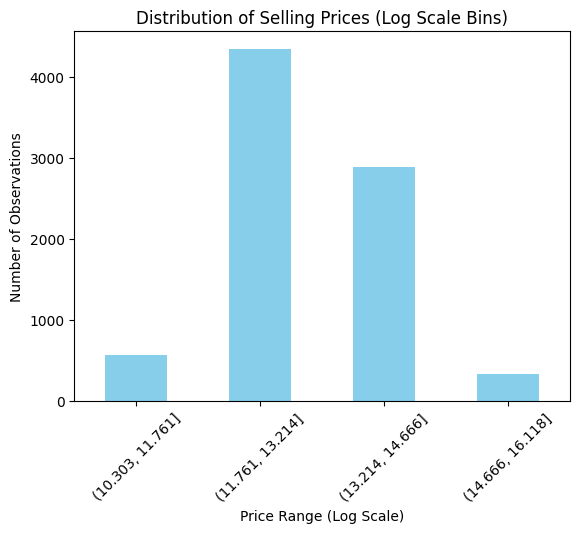

In [4]:
# plot the values
# Value counts for each bin
bin_counts = pd.value_counts(binned_data)

# Bar plot
bin_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Selling Prices (Log Scale Bins)')
plt.xlabel('Price Range (Log Scale)')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

class LogisticRegression:
    
    def __init__(self, k, n, method, alpha=0.01, max_iter=5000, use_penalty=False, penalty='ridge', lambda_=0.01):
        self.k = k  # Number of classes
        self.n = n  # Number of features
        self.alpha = alpha  # Learning rate
        self.max_iter = max_iter  # Maximum iterations
        self.method = method  # Optimization method: 'batch', 'minibatch', or 'sto'
        self.use_penalty = use_penalty  # Whether to use penalty (regularization)
        self.penalty = penalty  # Type of penalty ('ridge' for L2)
        self.lambda_ = lambda_  # Regularization strength
        self.W = np.random.rand(n + 1, k)  # Initialize weights

    def fit(self, X, Y):
        self.W = np.random.rand(self.n + 1, self.k)   # Initialize weights
        self.losses = []  # To store loss values
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                indices = np.random.choice(X.shape[0], size=batch_size, replace=False)  # Randomly select indices for the batch
                batch_X = X[indices]
                batch_Y = Y[indices]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        elif self.method == "sto":
            start_time = time.time()
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])  # Randomly select an index
                X_train = X[idx, :].reshape(1, -1)  # Reshape for a single sample
                Y_train = Y[idx].reshape(1, -1)  # Reshape for a single sample
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        else:
            raise ValueError('Method must be one of the following: "batch", "minibatch", or "sto".')
        
    def gradient(self, X, Y):
        m = X.shape[0]  # Number of training examples
        h = self.h_theta(X, self.W)  # Hypothesis
        loss = -np.sum(Y * np.log(h)) / m  # Cross-entropy loss
        
        # Apply penalty if use_penalty is True
        if self.use_penalty and self.penalty == 'ridge':
            loss += (self.lambda_ / (2 * m)) * np.sum(np.square(self.W))  # Ridge penalty (L2)
        
        error = h - Y  # Error term
        grad = self.softmax_grad(X, error)
        
        # Apply gradient for penalty if use_penalty is True
        if self.use_penalty and self.penalty == 'ridge':
            grad += (self.lambda_ / m) * self.W  # Add Ridge gradient (L2)
        
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True)) / np.sum(np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True)), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error / X.shape[0]


    
    def h_theta(self, X, W):
        #print(f"X shape: {X.shape}")
        #print(f"W shape: {W.shape}")
        return self.softmax(X @ W)

    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses over iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    
    def accuracy(self, y_true, y_pred):
        correct = np.sum(y_true == y_pred)
        total = len(y_true)
        return correct / total

    def precision(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FP = np.sum((y_true != class_label) & (y_pred == class_label))
        return TP / (TP + FP) if (TP + FP) > 0 else 0

    def recall(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FN = np.sum((y_true == class_label) & (y_pred != class_label))
        return TP / (TP + FN) if (TP + FN) > 0 else 0

    def f1_score(self, y_true, y_pred, class_label):
        prec = self.precision(y_true, y_pred, class_label)
        rec = self.recall(y_true, y_pred, class_label)
        return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    
    # New macro precision, recall, and f1 functions
    def macro_precision(self, y_true, y_pred):
        classes = np.unique(y_true)
        precision_scores = [self.precision(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(precision_scores)

    def macro_recall(self, y_true, y_pred):
        classes = np.unique(y_true)
        recall_scores = [self.recall(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(recall_scores)

    def macro_f1(self, y_true, y_pred):
        classes = np.unique(y_true)
        f1_scores = [self.f1_score(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(f1_scores)
    
    def weighted_recall(self, class_labels, weights, recalls):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
            weighted_sum += weight * recalls[class_label]  # Multiply recall by weight
        return weighted_sum / sum(weights)

    def weighted_precision(self, class_labels, weights, precisions):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
            weighted_sum += weight * precisions[class_label]  # Multiply precision by weight
        return weighted_sum / sum(weights)
    
    def weighted_f1(self, class_labels, weights, precisions, recalls):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
        
            # Calculate the F1 score for the current class
            if precisions[class_label] + recalls[class_label] > 0:  # Prevent division by zero
                f1_score = 2 * (precisions[class_label] * recalls[class_label]) / (precisions[class_label] + recalls[class_label])
            else:
                f1_score = 0  # Assign 0 if both precision and recall are 0

            weighted_sum += weight * f1_score  # Multiply F1 score by weight
        return weighted_sum / sum(weights)


In [10]:
import os
import mlflow
# Set the environment variables for MLflow authentication
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

# Set the MLflow tracking URI to the CSIM MLflow server
mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th")

# Create an experiment
mlflow.set_experiment("st125159-a3")

2024/10/05 20:15:33 INFO mlflow.tracking.fluent: Experiment with name 'st125159-a3' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/349075529584389172', creation_time=1728134083048, experiment_id='349075529584389172', last_update_time=1728134083048, lifecycle_stage='active', name='st125159-a3', tags={}>

In [12]:
# from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import mlflow
import mlflow.sklearn

# Step 1: Prepare data
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features for simplicity
y = iris.target  # Target variable with 3 classes

# Split data into training and test datasets
idx = np.arange(0, len(X), 1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7 * len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

# One-hot encoding the labels
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# Create one-hot encoded labels
Y_train_encoded = one_hot_encode(y_train, len(set(y)))  # Use all classes

# Define parameter grid
penalties = ['l1', 'l2']  # Different regularization methods
lambdas = [0.1, 0.01, 0.001]  # Different lambda values
methods = ['batch', 'minibatch', 'sto']  # Different optimization methods

best_accuracy = 0  # Track the best accuracy
best_run_details = None  # Store details of the best run

# Iterate over different combinations of penalty, lambda, and method
for penalty in penalties:
    for lambda_ in lambdas:
        for method in methods:
            # Start MLflow experiment
            with mlflow.start_run():
                # Log parameters for each run
                mlflow.log_param("penalty", penalty)
                mlflow.log_param("lambda", lambda_)
                mlflow.log_param("method", method)

                # Create and fit the logistic regression model (Assuming log_reg_ridge is a custom class)
                log_reg_ridge = LogisticRegression(k=len(set(y)), n=X_train.shape[1] - 1,
                                                   method=method, use_penalty=True, 
                                                   penalty=penalty, lambda_=lambda_)
                log_reg_ridge.fit(X_train, Y_train_encoded)

                # Predict on the test set
                y_pred = log_reg_ridge.predict(X_test)

                # Evaluation metrics
                accuracy = log_reg_ridge.accuracy(y_test, y_pred)
                macro_precision = log_reg_ridge.macro_precision(y_test, y_pred)
                macro_recall = log_reg_ridge.macro_recall(y_test, y_pred)
                macro_f1 = log_reg_ridge.macro_f1(y_test, y_pred)

                # Log metrics for each run
                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("macro_precision", macro_precision)
                mlflow.log_metric("macro_recall", macro_recall)
                mlflow.log_metric("macro_f1_score", macro_f1)

                # Check if this run has the best accuracy so far
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_run_details = {
                        'penalty': penalty,
                        'lambda': lambda_,
                        'method': method,
                        'accuracy': accuracy,
                        'macro_precision': macro_precision,
                        'macro_recall': macro_recall,
                        'macro_f1': macro_f1
                    }

                # End the current MLflow run
                mlflow.end_run()

# After all runs, log the best model details in a separate run
if best_run_details:
    with mlflow.start_run(run_name="Best Model Run"):
        # Log the best parameters
        mlflow.log_param("best_penalty", best_run_details['penalty'])
        mlflow.log_param("best_lambda", best_run_details['lambda'])
        mlflow.log_param("best_method", best_run_details['method'])

        # Log the best metrics
        mlflow.log_metric("best_accuracy", best_run_details['accuracy'])
        mlflow.log_metric("best_macro_precision", best_run_details['macro_precision'])
        mlflow.log_metric("best_macro_recall", best_run_details['macro_recall'])
        mlflow.log_metric("best_macro_f1_score", best_run_details['macro_f1'])

    print("\nBest Model Details:")
    print(f"Penalty: {best_run_details['penalty']}")
    print(f"Lambda: {best_run_details['lambda']}")
    print(f"Method: {best_run_details['method']}")
    print(f"Accuracy: {best_run_details['accuracy']}")
    print(f"Macro Precision: {best_run_details['macro_precision']}")
    print(f"Macro Recall: {best_run_details['macro_recall']}")
    print(f"Macro F1 Score: {best_run_details['macro_f1']}")


Loss at iteration 0: 0.857699527304023
Loss at iteration 500: 0.4527927770918269
Loss at iteration 1000: 0.36361979947673356
Loss at iteration 1500: 0.3098751356396378
Loss at iteration 2000: 0.2725634685036938
Loss at iteration 2500: 0.2449182004390842
Loss at iteration 3000: 0.2235580412455171
Loss at iteration 3500: 0.20653811786201606
Loss at iteration 4000: 0.1926458338995582
Loss at iteration 4500: 0.18108266833206857
Time taken: 0.16560912132263184


2024/10/05 20:54:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run welcoming-bass-603 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/8aea60e25ba743369319b3c76255cc31.
2024/10/05 20:54:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.0524332609939848
Loss at iteration 500: 0.45318048300839764
Loss at iteration 1000: 0.31341468988095833
Loss at iteration 1500: 0.3818651892993579
Loss at iteration 2000: 0.2901833448323929
Loss at iteration 2500: 0.20988085949353866
Loss at iteration 3000: 0.2183797223593104
Loss at iteration 3500: 0.19593983832716366
Loss at iteration 4000: 0.20179526809127946
Loss at iteration 4500: 0.18447601222103455
Time taken: 0.22817730903625488


2024/10/05 20:54:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run rare-croc-339 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/1c9cbbfc36db402cbb409371316fb1f5.
2024/10/05 20:54:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.5351993296158205
Loss at iteration 500: 0.12402626351187519
Loss at iteration 1000: 0.6556114549693463
Loss at iteration 1500: 0.4164432688141862
Loss at iteration 2000: 0.04808199731342329
Loss at iteration 2500: 0.05149303397322649
Loss at iteration 3000: 0.16158935310763684
Loss at iteration 3500: 0.2681484060361082
Loss at iteration 4000: 0.08283910121955022
Loss at iteration 4500: 0.036820396357299
Time taken: 0.12000870704650879


2024/10/05 20:54:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run handsome-newt-706 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/6a2373c5578c4e5c922befc039b7c761.
2024/10/05 20:54:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.985212675834576
Loss at iteration 500: 0.47496510792734375
Loss at iteration 1000: 0.3732475925448207
Loss at iteration 1500: 0.3151559325244821
Loss at iteration 2000: 0.27584398988432773
Loss at iteration 2500: 0.24712204188099135
Loss at iteration 3000: 0.22512059856131103
Loss at iteration 3500: 0.20769074480384708
Loss at iteration 4000: 0.19352231248145044
Loss at iteration 4500: 0.18176538843240075
Time taken: 0.18112730979919434


2024/10/05 20:54:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run trusting-midge-683 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/e03ace6e9f444a6e8920f704e6b0438c.
2024/10/05 20:54:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.3364874312467685
Loss at iteration 500: 0.51977382215399
Loss at iteration 1000: 0.4414025634508811
Loss at iteration 1500: 0.37300136267718426
Loss at iteration 2000: 0.2731346093467567
Loss at iteration 2500: 0.21795396834143668
Loss at iteration 3000: 0.23067669902525217
Loss at iteration 3500: 0.20489128828318579
Loss at iteration 4000: 0.19054591701519533
Loss at iteration 4500: 0.17171243002374906
Time taken: 0.22921490669250488


2024/10/05 20:54:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run orderly-crane-945 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/608285dc3fb345dbb5866c36626ca5bc.
2024/10/05 20:54:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.4969323953359848
Loss at iteration 500: 0.12405705469100067
Loss at iteration 1000: 0.6212913725311289
Loss at iteration 1500: 0.7697328463656706
Loss at iteration 2000: 0.49738689076163844
Loss at iteration 2500: 0.08855203377262075
Loss at iteration 3000: 0.07536360190351539
Loss at iteration 3500: 0.24815088921953235
Loss at iteration 4000: 0.1896346140083103
Loss at iteration 4500: 0.03341731064508647
Time taken: 0.12651348114013672


2024/10/05 20:54:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run inquisitive-bee-750 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/0edacbf5b66940249b956dbdb806ecdd.
2024/10/05 20:54:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.9552404071315255
Loss at iteration 500: 0.4303837288718962
Loss at iteration 1000: 0.3436580326820876
Loss at iteration 1500: 0.2939031636582209
Loss at iteration 2000: 0.2597983587904567
Loss at iteration 2500: 0.23457275055203353
Loss at iteration 3000: 0.21503477422667533
Loss at iteration 3500: 0.19940415666043768
Loss at iteration 4000: 0.18658836508614599
Loss at iteration 4500: 0.17587323254097673
Time taken: 0.16597437858581543


2024/10/05 20:54:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run adorable-carp-570 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/a5b9bad8b48648969d33dbdcf12ad517.
2024/10/05 20:54:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.1701890694956347
Loss at iteration 500: 0.43108658808098743
Loss at iteration 1000: 0.390566197048709
Loss at iteration 1500: 0.30304539328510594
Loss at iteration 2000: 0.33608199308796943
Loss at iteration 2500: 0.2649769177222682
Loss at iteration 3000: 0.2252936454189272
Loss at iteration 3500: 0.2171074572446094
Loss at iteration 4000: 0.21597803801382762
Loss at iteration 4500: 0.21557569189356315
Time taken: 0.21811413764953613


2024/10/05 20:54:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-stork-811 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/ab7896150fc4457a9f04176297af5cf7.
2024/10/05 20:54:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.2783455653814373
Loss at iteration 500: 0.8982658158799061
Loss at iteration 1000: 0.08392472263739383
Loss at iteration 1500: 0.38766527007641505
Loss at iteration 2000: 0.42925943277429585
Loss at iteration 2500: 0.3138043737828635
Loss at iteration 3000: 0.41947759548970215
Loss at iteration 3500: 0.03967019317995971
Loss at iteration 4000: 0.10836563992404699
Loss at iteration 4500: 0.22109316501432386
Time taken: 0.14606618881225586


2024/10/05 20:54:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run gregarious-goose-852 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/78d495b4c8444a52a5f383324a8401e2.
2024/10/05 20:54:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.5498495202594935
Loss at iteration 500: 0.46386063146981127
Loss at iteration 1000: 0.3649459892041542
Loss at iteration 1500: 0.30975427046936255
Loss at iteration 2000: 0.2721139669057844
Loss at iteration 2500: 0.2444136105418618
Loss at iteration 3000: 0.22307458269275135
Loss at iteration 3500: 0.20609481181027647
Loss at iteration 4000: 0.1922440750751672
Loss at iteration 4500: 0.1807187318432029
Time taken: 0.19389581680297852


2024/10/05 20:54:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run burly-mule-200 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/151acaac35614df0bbb7205c3c2c496d.
2024/10/05 20:54:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.1023145822225962
Loss at iteration 500: 0.5109994026745038
Loss at iteration 1000: 0.37652675282418024
Loss at iteration 1500: 0.3315197148830571
Loss at iteration 2000: 0.24713808316566477
Loss at iteration 2500: 0.23080184756137914
Loss at iteration 3000: 0.2753208522352443
Loss at iteration 3500: 0.24498420676980182
Loss at iteration 4000: 0.23403930205525894
Loss at iteration 4500: 0.17469532090040465
Time taken: 0.21593189239501953


2024/10/05 20:54:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run honorable-asp-592 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/b60955bd5bd946a186bfb1aaf8903496.
2024/10/05 20:54:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.3703738072855927
Loss at iteration 500: 0.7632629674004933
Loss at iteration 1000: 0.6137289665034046
Loss at iteration 1500: 0.3788113652102874
Loss at iteration 2000: 0.06059599438603656
Loss at iteration 2500: 0.0252100252766199
Loss at iteration 3000: 0.09891286538831551
Loss at iteration 3500: 0.28005562688612445
Loss at iteration 4000: 0.5334778274336746
Loss at iteration 4500: 0.015164415158245646
Time taken: 0.11711859703063965


2024/10/05 20:54:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run crawling-crow-987 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/27415319ad16482f92d752d6a23ae8e2.
2024/10/05 20:54:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.2109284182324729
Loss at iteration 500: 0.4806002176049291
Loss at iteration 1000: 0.3759750610773529
Loss at iteration 1500: 0.31692370383534674
Loss at iteration 2000: 0.2771330361433764
Loss at iteration 2500: 0.24812109905124813
Loss at iteration 3000: 0.22592420228993937
Loss at iteration 3500: 0.20835401792746536
Loss at iteration 4000: 0.19408057079307653
Loss at iteration 4500: 0.18224268693759527
Time taken: 0.18121647834777832


2024/10/05 20:54:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run valuable-shoat-592 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/c2ba37d50399480da716bfe8524baf6a.
2024/10/05 20:54:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.824811724477364
Loss at iteration 500: 0.5401648512143351
Loss at iteration 1000: 0.38481953516269907
Loss at iteration 1500: 0.3173225693540064
Loss at iteration 2000: 0.2960249286644026
Loss at iteration 2500: 0.27603542462053426
Loss at iteration 3000: 0.2136790110828032
Loss at iteration 3500: 0.19530726686650277
Loss at iteration 4000: 0.18557354843294133
Loss at iteration 4500: 0.20408095879626803
Time taken: 0.21500754356384277


2024/10/05 20:54:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run polite-dolphin-641 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/622920a46fe7436cab402d6f5c176644.
2024/10/05 20:54:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.0900058406104856
Loss at iteration 500: 0.6096917983023467
Loss at iteration 1000: 0.06923720847166957
Loss at iteration 1500: 0.07064025175872016
Loss at iteration 2000: 0.47393212456435896
Loss at iteration 2500: 0.35667733833766596
Loss at iteration 3000: 0.10641814713193141
Loss at iteration 3500: 0.03190772454758499
Loss at iteration 4000: 0.2096388320707995
Loss at iteration 4500: 0.2846182019428734
Time taken: 0.1206059455871582


2024/10/05 20:54:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run inquisitive-ray-680 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/5370639d7d8245ca863eed663d1a24ad.
2024/10/05 20:54:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.8847945837239257
Loss at iteration 500: 0.4381194812668306
Loss at iteration 1000: 0.3513237650724111
Loss at iteration 1500: 0.30028559641396363
Loss at iteration 2000: 0.2650391135241741
Loss at iteration 2500: 0.23890698927236842
Loss at iteration 3000: 0.21866052401212827
Loss at iteration 3500: 0.20247365962417335
Loss at iteration 4000: 0.18921661121641187
Loss at iteration 4500: 0.17814725764661404
Time taken: 0.18560171127319336


2024/10/05 20:54:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run colorful-wren-455 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/24a51662ad6c415db1d7d715c43ad434.
2024/10/05 20:54:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.8578104768053069
Loss at iteration 500: 0.4505647433651401
Loss at iteration 1000: 0.3475913413100999
Loss at iteration 1500: 0.26724799812297334
Loss at iteration 2000: 0.2964245116746064
Loss at iteration 2500: 0.2978270141447979
Loss at iteration 3000: 0.17280091613432677
Loss at iteration 3500: 0.23066854235112183
Loss at iteration 4000: 0.12524958007122
Loss at iteration 4500: 0.16774787532766489
Time taken: 0.21297049522399902


2024/10/05 20:54:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run legendary-donkey-167 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/bde7c9b6d4d84dd7ba4eb757e9e7176d.
2024/10/05 20:54:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.548739997763994
Loss at iteration 500: 0.4182759130904765
Loss at iteration 1000: 0.4104327455697974
Loss at iteration 1500: 0.7009523961840141
Loss at iteration 2000: 0.4138967339875049
Loss at iteration 2500: 0.14364221645122224
Loss at iteration 3000: 0.3381316531108335
Loss at iteration 3500: 0.108411109800057
Loss at iteration 4000: 0.08486588648627401
Loss at iteration 4500: 0.038744393287639144
Time taken: 0.12796783447265625


2024/10/05 20:54:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run valuable-croc-775 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/21d5b92407ff4750ae3a666cb90a1ec8.
2024/10/05 20:54:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.
2024/10/05 20:54:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Best Model Run at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/85752b5a14484f5eb3a4326040a19b17.
2024/10/05 20:54:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.



Best Model Details:
Penalty: l1
Lambda: 0.1
Method: batch
Accuracy: 0.9111111111111111
Macro Precision: 0.9215686274509803
Macro Recall: 0.9251461988304094
Macro F1 Score: 0.9212962962962963
